En esta notebook muestra la solución al problema de Fuerza Central pero esta vez utilizando solve_ivp.

In [1]:
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

#------------------------------------------------#
#---Parámetros físicos y condiciones iniciales---#
#------------------------------------------------#
G = 6.674 * 10**(-11) # Constante de Gravitación Universal
M = 1.989 * 10**30 # La masota del cuerpo grandote.
m = 5.972 * 10**24 # La masita del cuerpo que orbita
p0 = 1.496*10**(11) # Posición inicial física. Que coincide con x_0. Una unidad astronómica.

# Velocidades iniciales en SI. En general ambas son distintas de cero.
# Para la tierra considera directamente que la v0_x = 0
v0_x = 0.0
v0_y = 30000

v0 = sqrt(v0_x**2 + v0_y**2)
#sqrt(2*G*M/p0) #(Parábola) #30000 (Velocidad de la Tierra)
print("Velocidad inicial en SI: ", v0)

# Tiempo final considerando 365 días
print("Tiempo Adiomensional sugerido: ", sqrt((G*M)/p0**3)*(3.154*10**(7)))
E0 = 0.5*m*v0**2 - (G*M*m)/p0

print("Energía Inicial en Joules: ", E0)

Velocidad inicial en SI:  30000.0
Tiempo Adiomensional sugerido:  6.280219042890066
Energía Inicial en Joules:  -2.6117863363636366e+33


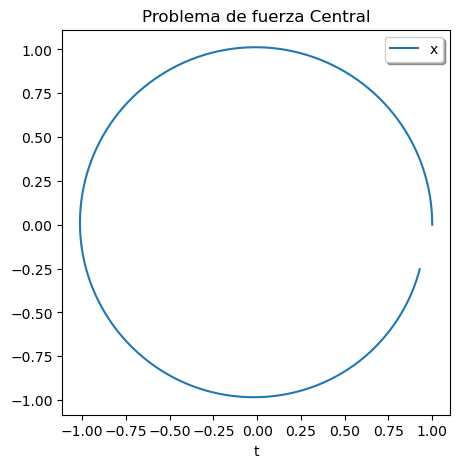

In [2]:
#--------------------------------------------#
#---Las Ecuaciones y sus Valores Iniciales---#
#--------------------------------------------#

def S(t, z):
    x, vx, y, vy = z
    r = np.sqrt(x**2 + y**2)
    return [vx, -x/(r**3), vy, -y/(r**3)]
    
# Posiciones y velocidades iniciales
x0 = 1.0
vx0 = sqrt(p0/(G*M))*v0_x
y0 = 0.0
vy0 = sqrt(p0/(G*M))*v0_y

#-------------#
#---Dominio---#
#-------------#
t0 = 0.0
tf = 6.0
N = 300

# Esto es una solución pero quién sabe con cuántos puntos
sol = solve_ivp(S, [t0, tf], [x0, vx0, y0,vy0], dense_output=True)

# Definiéndo ésto ya especifícas cuántos puntos quieres
t = np.linspace(t0, tf, N)
z = sol.sol(t)

x = z[0]
vx = z[1]
y = z[2]
vy = z[3]

# Graficamos
plt.figure(figsize=(5,5))
plt.plot(x, y)
plt.xlabel('t')
plt.legend(['x', 'y'], shadow=True)
plt.title('Problema de fuerza Central')
plt.show()